In [1]:
import sys
sys.path.append('../..')
import cortex_etl as c_etl

In [ ]:
ma_v1 = c_etl.analysis_initial_processing('v1_spont.yaml') # loglevel="ERROR"
a_hex0_v1 = ma_v1.hex0_spikes

# ma_v2 = c_etl.analysis_initial_processing('/gpfs/bbp.cscs.ch/project/proj83/home/isbister/physiology_2023/cortex_etl/configs/post_physiology_2023/campaigns/schneider_mizell/0_recalibration/0_0_recalibration_5thIter_20_3_24.yaml') # loglevel="ERROR"
# figdir = 'comp_to_5thIter/'
ma_v2 = c_etl.analysis_initial_processing('/gpfs/bbp.cscs.ch/project/proj83/home/isbister/physiology_2023/cortex_etl/configs/post_physiology_2023/campaigns/schneider_mizell/0_recalibration/0_0_recalibration_6thIter_20_3_24.yaml') # loglevel="ERROR"
figdir = 'comp_to_6thIter/'
a_hex0_v2 = ma_v2.hex0_spikes

import os; os.makedirs(figdir, exist_ok=True)

In [3]:
c_etl.post_analysis(a_hex0_v1)
c_etl.post_analysis(a_hex0_v2)


----- Custom post analysis -----


[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
2024-04-04 09:19:30,191 INFO blueetl.parallel: Considering 60 rows for columns ['simulation_id', 'circuit_id']
2024-04-04 09:19:30,194 INFO blueetl.parallel: Tasks to be executed: 60
[Parallel(n_jobs=36)]: Done   1 tasks      | elapsed:    5.3s
[Parallel(n_jobs=36)]: Done   3 out of  60 | elapsed:    5.4s remaining:  1.7min
[Parallel(n_jobs=36)]: Done  10 out of  60 | elapsed:    5.8s remaining:   29.0s
[Parallel(n_jobs=36)]: Done  17 out of  60 | elapsed:    6.1s remaining:   15.5s
[Parallel(n_jobs=36)]: Done  24 out of  60 | elapsed:    6.4s remaining:    9.5s
[Parallel(n_jobs=36)]: Done  31 out of  60 | elapsed:    6.6s remaining:    6.2s
[Parallel(n_jobs=36)]: Done  38 out of  60 | elapsed:    6.7s remaining:    3.9s
[Parallel(n_jobs=36)]: Done  45 out of  60 | elapsed:    6.8s remaining:    2.3s
[Parallel(n_jobs=36)]: Done  52 out of  60 | elapsed:    6.9s remaining:    1.1s
[Parallel(n_jobs=36)]: Done  6

----- Custom post analysis complete: 18.08s -----

----- Custom post analysis -----


[Parallel(n_jobs=36)]: Using backend LokyBackend with 36 concurrent workers.
2024-04-04 09:19:48,276 INFO blueetl.parallel: Considering 60 rows for columns ['simulation_id', 'circuit_id']
2024-04-04 09:19:48,279 INFO blueetl.parallel: Tasks to be executed: 60
[Parallel(n_jobs=36)]: Done   2 tasks      | elapsed:    1.6s
[Parallel(n_jobs=36)]: Done   3 out of  60 | elapsed:    1.6s remaining:   29.5s
[Parallel(n_jobs=36)]: Done  10 out of  60 | elapsed:    1.6s remaining:    7.9s
[Parallel(n_jobs=36)]: Done  17 out of  60 | elapsed:    1.6s remaining:    4.0s
[Parallel(n_jobs=36)]: Done  24 out of  60 | elapsed:    1.6s remaining:    2.4s
[Parallel(n_jobs=36)]: Done  31 out of  60 | elapsed:    1.6s remaining:    1.5s
[Parallel(n_jobs=36)]: Done  38 out of  60 | elapsed:    1.8s remaining:    1.1s
[Parallel(n_jobs=36)]: Done  45 out of  60 | elapsed:    2.0s remaining:    0.7s
[Parallel(n_jobs=36)]: Done  52 out of  60 | elapsed:    2.3s remaining:    0.3s
[Parallel(n_jobs=36)]: Done  6

----- Custom post analysis complete: 18.51s -----


[Parallel(n_jobs=36)]: Done  60 out of  60 | elapsed:    2.6s finished


In [ ]:
# c_etl.plot_multi_sim_analysis(a_hex0_v1)
# c_etl.plot_multi_sim_analysis(a_hex0_v2)

In [ ]:
import seaborn as sns
sns.set(style="ticks", context="paper", font="Helvetica Neue",
        rc={"axes.labelsize": 7, "legend.fontsize": 6, "axes.linewidth": 0.6, "xtick.labelsize": 6, "ytick.labelsize": 6,
            "xtick.major.size": 2, "xtick.major.width": 0.5, "xtick.minor.size": 1.5, "xtick.minor.width": 0.3,
            "ytick.major.size": 2, "ytick.major.width": 0.5, "ytick.minor.size": 1.5, "ytick.minor.width": 0.3,
            "axes.titlesize": 7, "axes.spines.right": False, "axes.spines.top": False})

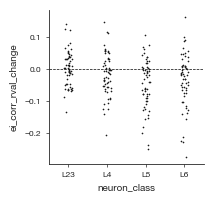

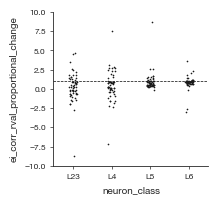

Custom post analysis:  1
Custom post analysis:  37
Custom post analysis:  46
Custom post analysis:  12
Custom post analysis:  49
Custom post analysis:  3
Custom post analysis:  38
Custom post analysis:  47
Custom post analysis:  14
Custom post analysis:  50
Custom post analysis:  20
Custom post analysis:  13
Custom post analysis:  48
Custom post analysis:  2
Custom post analysis:  39
Custom post analysis:  48
Custom post analysis:  15
Custom post analysis:  51
Custom post analysis:  5
Custom post analysis:  44
Custom post analysis:  17
Custom post analysis:  53
Custom post analysis:  22
Custom post analysis:  16
Custom post analysis:  52
Custom post analysis:  7
Custom post analysis:  40
Custom post analysis:  50
Custom post analysis:  18
Custom post analysis:  54
Custom post analysis:  14
Custom post analysis:  19
Custom post analysis:  55
Custom post analysis:  27
Custom post analysis:  20
Custom post analysis:  56
Custom post analysis:  23
Custom post analysis:  21
Custom post analy

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

v1_by_layer = a_hex0_v1.custom['by_layer_and_simulation'].etl.q(window="conn_spont")
v2_by_layer = a_hex0_v2.custom['by_layer_and_simulation'].etl.q(window="conn_spont")

merged_by_layer = pd.merge(v1_by_layer, v2_by_layer, on=['ca', 'desired_connected_proportion_of_invivo_frs', 'depol_stdev_mean_ratio', 'neuron_class'], suffixes=('_v1', '_v2'))
merged_by_layer['ei_corr_rval_change'] = merged_by_layer['ei_corr_rval_v2'] - merged_by_layer['ei_corr_rval_v1']
merged_by_layer['ei_corr_rval_proportional_change'] = merged_by_layer['ei_corr_rval_v2'] / merged_by_layer['ei_corr_rval_v1']
merged_by_layer_non_bursting = merged_by_layer[np.logical_and(~merged_by_layer.bursting_v1, ~merged_by_layer.bursting_v2)]

plt.figure(figsize=(2,2))
# sns.violinplot(x="neuron_class", y="ei_corr_rval_change", data=merged_by_layer_non_bursting,color="0.8")
sns.stripplot(x="neuron_class", y="ei_corr_rval_change", data=merged_by_layer_non_bursting, jitter=True, s=1.2, c='k')
ax = plt.gca()
ax.axhline(y=0, color='black', linestyle='dashed', linewidth=.5)
plt.savefig(figdir + "layerwise_ei_change.pdf")
plt.show()
plt.close()

plt.figure(figsize=(2,2))
# sns.violinplot(x="neuron_class", y="ei_corr_rval_change", data=merged_by_layer_non_bursting,color="0.8")
sns.stripplot(x="neuron_class", y="ei_corr_rval_proportional_change", data=merged_by_layer_non_bursting, jitter=True, s=1.2, c='k')
ax = plt.gca()
ax.set_ylim([-10.0, 10.0])
ax.axhline(y=1, color='black', linestyle='dashed', linewidth=.5)
plt.savefig(figdir + "layerwise_ei_proportional_change.pdf")
plt.show()
plt.close()

/nvme/isbister/2109738/ipykernel_3632/3769735007.py:99: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels)


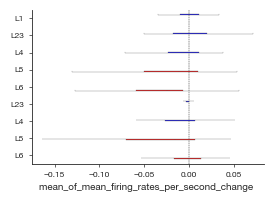

/nvme/isbister/2109738/ipykernel_3632/3769735007.py:97: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=y, x=x, hue=hue, data=data, palette=palette, order=order, orient='h', width=width, linewidth=.2, showfliers=False, gap=gap, dodge=True)
/nvme/isbister/2109738/ipykernel_3632/3769735007.py:99: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels)


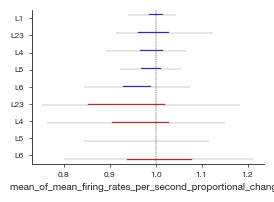

/nvme/isbister/2109738/ipykernel_3632/3769735007.py:97: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=y, x=x, hue=hue, data=data, palette=palette, order=order, orient='h', width=width, linewidth=.2, showfliers=False, gap=gap, dodge=True)
/nvme/isbister/2109738/ipykernel_3632/3769735007.py:99: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels)


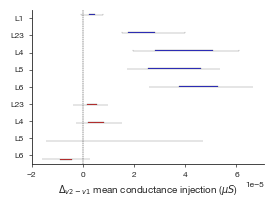

/nvme/isbister/2109738/ipykernel_3632/3769735007.py:97: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=y, x=x, hue=hue, data=data, palette=palette, order=order, orient='h', width=width, linewidth=.2, showfliers=False, gap=gap, dodge=True)
/nvme/isbister/2109738/ipykernel_3632/3769735007.py:99: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels)


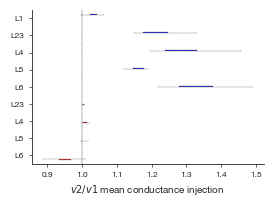

/nvme/isbister/2109738/ipykernel_3632/3769735007.py:97: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=y, x=x, hue=hue, data=data, palette=palette, order=order, orient='h', width=width, linewidth=.2, showfliers=False, gap=gap, dodge=True)
/nvme/isbister/2109738/ipykernel_3632/3769735007.py:99: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels)


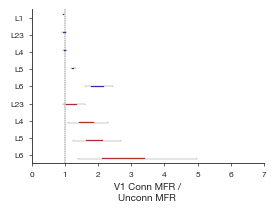

/nvme/isbister/2109738/ipykernel_3632/3769735007.py:97: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=y, x=x, hue=hue, data=data, palette=palette, order=order, orient='h', width=width, linewidth=.2, showfliers=False, gap=gap, dodge=True)
/nvme/isbister/2109738/ipykernel_3632/3769735007.py:99: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels)


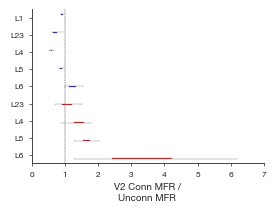

/nvme/isbister/2109738/ipykernel_3632/3769735007.py:97: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=y, x=x, hue=hue, data=data, palette=palette, order=order, orient='h', width=width, linewidth=.2, showfliers=False, gap=gap, dodge=True)
/nvme/isbister/2109738/ipykernel_3632/3769735007.py:99: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels)


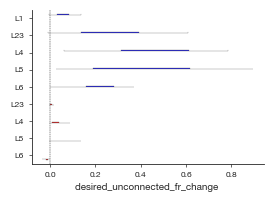

/nvme/isbister/2109738/ipykernel_3632/3769735007.py:97: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=y, x=x, hue=hue, data=data, palette=palette, order=order, orient='h', width=width, linewidth=.2, showfliers=False, gap=gap, dodge=True)
/nvme/isbister/2109738/ipykernel_3632/3769735007.py:99: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels)


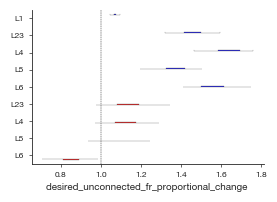

/nvme/isbister/2109738/ipykernel_3632/3769735007.py:97: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=y, x=x, hue=hue, data=data, palette=palette, order=order, orient='h', width=width, linewidth=.2, showfliers=False, gap=gap, dodge=True)
/nvme/isbister/2109738/ipykernel_3632/3769735007.py:99: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels)


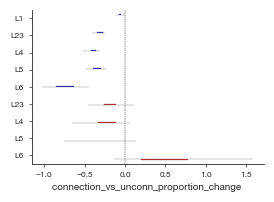

/nvme/isbister/2109738/ipykernel_3632/3769735007.py:97: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=y, x=x, hue=hue, data=data, palette=palette, order=order, orient='h', width=width, linewidth=.2, showfliers=False, gap=gap, dodge=True)
/nvme/isbister/2109738/ipykernel_3632/3769735007.py:99: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels)


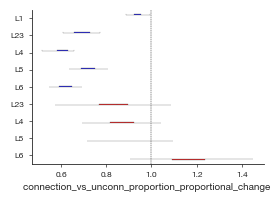

/nvme/isbister/2109738/ipykernel_3632/3769735007.py:99: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels)


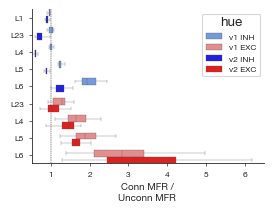

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# print(a_hex0_v1.custom['by_neuron_class'].columns)

v1_by_nc = a_hex0_v1.custom['by_neuron_class'].etl.q(window="conn_spont")
v2_by_nc = a_hex0_v2.custom['by_neuron_class'].etl.q(window="conn_spont")

# print(v1_by_nc.columns)

merged_by_nc = pd.merge(v1_by_nc, v2_by_nc, on=['ca', 'desired_connected_proportion_of_invivo_frs', 'depol_stdev_mean_ratio', 'neuron_class'], suffixes=('_v1', '_v2'))

merged_by_nc['true_mean_conductance_change'] = merged_by_nc.true_mean_conductance_v2 - merged_by_nc.true_mean_conductance_v1
merged_by_nc['true_mean_conductance_proportional_change'] = merged_by_nc.true_mean_conductance_v2 / merged_by_nc.true_mean_conductance_v1

merged_by_nc['connection_vs_unconn_proportion_change'] = merged_by_nc.connection_vs_unconn_proportion_v2 - merged_by_nc.connection_vs_unconn_proportion_v1
merged_by_nc['connection_vs_unconn_proportion_proportional_change'] = merged_by_nc.connection_vs_unconn_proportion_v2 / merged_by_nc.connection_vs_unconn_proportion_v1

merged_by_nc['desired_unconnected_fr_change'] = merged_by_nc.desired_unconnected_fr_v2 - merged_by_nc.desired_unconnected_fr_v1
merged_by_nc['desired_unconnected_fr_proportional_change'] = merged_by_nc.desired_unconnected_fr_v2 / merged_by_nc.desired_unconnected_fr_v1

merged_by_nc['mean_of_mean_firing_rates_per_second_change'] = merged_by_nc.mean_of_mean_firing_rates_per_second_v2 - merged_by_nc.mean_of_mean_firing_rates_per_second_v1
merged_by_nc['mean_of_mean_firing_rates_per_second_proportional_change'] = merged_by_nc.mean_of_mean_firing_rates_per_second_v2 / merged_by_nc.mean_of_mean_firing_rates_per_second_v1

merged_by_nc["neuron_class"] = merged_by_nc.neuron_class.cat.remove_unused_categories()

merged_by_nc = merged_by_nc[np.logical_and(merged_by_nc.connection_vs_unconn_proportion_v1 != np.inf, merged_by_nc.connection_vs_unconn_proportion_v2 != np.inf)]
merged_by_nc = merged_by_nc[np.logical_and(~merged_by_nc.bursting_v1, ~merged_by_nc.bursting_v2)]

def set_color(nc):
  return c_etl.NEURON_CLASS_LAYERS_AND_SYNAPSE_CLASSES[nc]["color"]

merged_by_nc['c'] = merged_by_nc.apply(lambda row: set_color(row['neuron_class']), axis=1)


nc_order = ['L1_INH', 'L23_INH', 'L4_INH', 'L5_INH', 'L6_INH', 'L23_EXC', 'L4_EXC', 'L5_EXC', 'L6_EXC']
nc_c = ['blue', 'blue', 'blue', 'blue', 'blue', 'red', 'red', 'red', 'red']
layer_labels = ['L1', 'L23', 'L4', 'L5', 'L6', 'L23', 'L4', 'L5', 'L6']
stat_labels = {
    "true_mean_conductance_change": "$\Delta_{v2 - v1}$ mean conductance injection",
    "true_mean_conductance_proportional_change": "$v2/v1$ mean conductance injection",
    "connection_vs_unconn_proportion_v1": "V1 Conn MFR /\nUnconn MFR",
    "connection_vs_unconn_proportion_v2": "V2 Conn MFR /\nUnconn MFR",
    "connection_vs_unconn_proportion": "Conn MFR /\nUnconn MFR",
    "desired_unconnected_fr_change": "desired_unconnected_fr_change",
    "desired_unconnected_fr_proportional_change": "desired_unconnected_fr_proportional_change",
    "connection_vs_unconn_proportion_change": "connection_vs_unconn_proportion_change",
    "connection_vs_unconn_proportion_proportional_change": "connection_vs_unconn_proportion_proportional_change",
    "mean_of_mean_firing_rates_per_second_change": "mean_of_mean_firing_rates_per_second_change",
    "mean_of_mean_firing_rates_per_second_proportional_change": "mean_of_mean_firing_rates_per_second_proportional_change"
}
stat_units = {
    "true_mean_conductance_change": "($\mu S$)",
    "true_mean_conductance_proportional_change": "",
    "connection_vs_unconn_proportion_v1": "",
    "connection_vs_unconn_proportion_v2": "",
    "connection_vs_unconn_proportion": "",
    "desired_unconnected_fr_change": "",
    "desired_unconnected_fr_proportional_change": "",
    "connection_vs_unconn_proportion_change": "",
    "connection_vs_unconn_proportion_proportional_change": "",
    "mean_of_mean_firing_rates_per_second_change": "",
    "mean_of_mean_firing_rates_per_second_proportional_change": ""
}



def max_of_two_arrays(a1, a2):
    return np.max([np.max(a1), np.max(a2)]) 
    

# figsize=(3,3)
# plt.figure(figsize=figsize)
# plt.scatter(merged_by_nc.mean_of_mean_firing_rates_per_second_v1, merged_by_nc.mean_of_mean_firing_rates_per_second_v2, c=merged_by_nc.c, s=.1)
# # lims = [0.0, max_of_two_arrays(merged_by_nc.mean_of_mean_firing_rates_per_second_v1, merged_by_nc.mean_of_mean_firing_rates_per_second_v2)]
# lims = [0.0, 2.5]
# plt.plot(lims, lims, lw=.3, c='k')
# plt.gca().set_xlim(lims)
# plt.gca().set_ylim(lims)
# plt.gca().set_xlabel('V1 MFR (Hz)')
# plt.gca().set_ylabel('V2 MFR (Hz)')
# plt.savefig(figdir + "FiringRateComparison.pdf")
# plt.show()
# plt.close()

    

    
figsize=(3,2)

def horizontal_box_plot(data, y, x, figsize, order, palette, labels, line_loc, figdir, lims=[], hue=None, width=.5, gap=0):
    plt.figure(figsize=figsize)
    # sns.violinplot(x="neuron_class", y="true_mean_conductance_change", data=merged_by_nc, palette=nc_c, order=nc_order)
    # sns.stripplot(y="neuron_class", x="true_mean_conductance_change", data=merged_by_nc, jitter=True, s=1.2, palette=nc_c, order=nc_order, orient='h')
    sns.boxplot(y=y, x=x, hue=hue, data=data, palette=palette, order=order, orient='h', width=width, linewidth=.2, showfliers=False, gap=gap, dodge=True)
    ax = plt.gca()
    ax.set_yticklabels(labels)
    ax.set_ylabel('')
    ax.set_xlabel(stat_labels[x] + " " + stat_units[x])
    ax.axvline(x=line_loc, color='black', linestyle='dashed', linewidth=.3, zorder=-4)
    
    if len(lims):
        ax.set_xlim(lims)
#         ax.set_ylim(lims)
    
#     plt.tight_layout()
    plt.savefig(figdir + x + '.pdf', bbox_inches='tight')
    plt.show()
    plt.close()
    

    
horizontal_box_plot(merged_by_nc, "neuron_class", "mean_of_mean_firing_rates_per_second_change", figsize, nc_order, nc_c, layer_labels, 0, figdir, hue="neuron_class")
horizontal_box_plot(merged_by_nc, "neuron_class", "mean_of_mean_firing_rates_per_second_proportional_change", figsize, nc_order, nc_c, layer_labels, 1, figdir)
    
horizontal_box_plot(merged_by_nc, "neuron_class", "true_mean_conductance_change", figsize, nc_order, nc_c, layer_labels, 0, figdir)
horizontal_box_plot(merged_by_nc, "neuron_class", "true_mean_conductance_proportional_change", figsize, nc_order, nc_c, layer_labels, 1, figdir)

horizontal_box_plot(merged_by_nc, "neuron_class", "connection_vs_unconn_proportion_v1", figsize, nc_order, nc_c, layer_labels, 1, figdir, lims=[0.0, 7.0])
horizontal_box_plot(merged_by_nc, "neuron_class", "connection_vs_unconn_proportion_v2", figsize, nc_order, nc_c, layer_labels, 1, figdir, lims=[0.0, 7.0])

horizontal_box_plot(merged_by_nc, "neuron_class", "desired_unconnected_fr_change", figsize, nc_order, nc_c, layer_labels, 0, figdir)
horizontal_box_plot(merged_by_nc, "neuron_class", "desired_unconnected_fr_proportional_change", figsize, nc_order, nc_c, layer_labels, 1, figdir)

horizontal_box_plot(merged_by_nc, "neuron_class", "connection_vs_unconn_proportion_change", figsize, nc_order, nc_c, layer_labels, 0, figdir)
horizontal_box_plot(merged_by_nc, "neuron_class", "connection_vs_unconn_proportion_proportional_change", figsize, nc_order, nc_c, layer_labels, 1, figdir)

a_v1 = merged_by_nc.loc[:, ['ca', 'desired_connected_proportion_of_invivo_frs', 'depol_stdev_mean_ratio', 'neuron_class', 'connection_vs_unconn_proportion_v1']]
a_v2 = merged_by_nc.loc[:, ['ca', 'desired_connected_proportion_of_invivo_frs', 'depol_stdev_mean_ratio', 'neuron_class', 'connection_vs_unconn_proportion_v2']]

a_v1['v'] = 'v1'
a_v1['connection_vs_unconn_proportion'] = a_v1['connection_vs_unconn_proportion_v1']
a_v2['v'] = 'v2'
a_v2['connection_vs_unconn_proportion'] = a_v2['connection_vs_unconn_proportion_v2']




import pandas as pd
a_cat = pd.concat([a_v1, a_v2])

def set_hue(row):
    
    if "INH" in row["neuron_class"]:
        if row['v'] == 'v1':
            return 'v1 INH'
        if row['v'] == 'v2':
            return 'v2 INH'
    elif "EXC" in row["neuron_class"]:
        if row['v'] == 'v1':
            return 'v1 EXC'
        if row['v'] == 'v2':
            return 'v2 EXC'
    


a_cat['hue'] = a_cat.apply(lambda row: set_hue(row), axis=1)
figsize = figsize=(3,2)
horizontal_box_plot(a_cat, "neuron_class", "connection_vs_unconn_proportion", figsize, nc_order, ['cornflowerblue', 'lightcoral', 'blue', 'red'], layer_labels, 1, figdir, hue='hue', width=.8, gap=-1, lims=[0.5, 6.5])
# horizontal_box_plot(a_cat.etl.q(neuron_class=['L6_INH', 'L5_INH', 'L4_INH', 'L23_INH', 'L1_INH']), "neuron_class", "connection_vs_unconn_proportion", figsize, ['L1_INH', 'L23_INH', 'L4_INH', 'L5_INH', 'L6_INH'], ['cornflowerblue', 'blue'], ['L1', 'L23', 'L4', 'L5', 'L6'], 1, figdir, hue='hue', width=.8, gap=-1, lims=[0.5, 6.5])






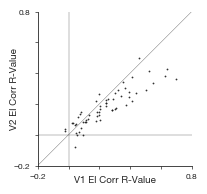

2024-03-28 10:37:45,333 INFO matplotlib.category: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-03-28 10:37:45,340 INFO matplotlib.category: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


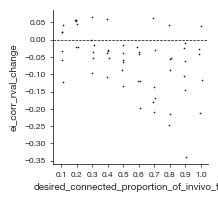

2024-03-28 10:37:45,773 INFO matplotlib.category: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-03-28 10:37:45,780 INFO matplotlib.category: Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


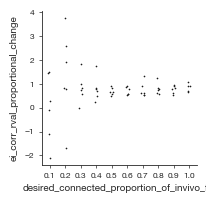

In [ ]:
v1_by_simulation = a_hex0_v1.custom['by_simulation']
v2_by_simulation = a_hex0_v2.custom['by_simulation']

merged_by_simulation = pd.merge(v1_by_simulation, v2_by_simulation, on=['ca', 'desired_connected_proportion_of_invivo_frs', 'depol_stdev_mean_ratio'], suffixes=('_v1', '_v2'))
merged_by_simulation['ei_corr_rval_change'] = merged_by_simulation.ei_corr_rval_v2 - merged_by_simulation.ei_corr_rval_v1
merged_by_simulation['ei_corr_rval_proportional_change'] = merged_by_simulation.ei_corr_rval_v2 / merged_by_simulation.ei_corr_rval_v1
merged_by_simulation_non_bursting = merged_by_simulation[np.logical_and(~merged_by_simulation.bursting_v1, ~merged_by_simulation.bursting_v2)]

figsize=(2,2)

plt.figure(figsize=figsize)
plt.scatter(merged_by_simulation_non_bursting.ei_corr_rval_v1, merged_by_simulation_non_bursting.ei_corr_rval_v2, s=.2, c='k')
lims = [-0.2, 0.8]
plt.plot(lims, lims, c='k', lw=.2)
plt.plot([0.0, 0.0], lims, c='k', lw=.2)
plt.plot(lims, [0.0, 0.0], c='k', lw=.2)
ax = plt.gca()
ax.set_xlim(lims)
ax.set_ylim(lims)
# ax.set_xlabel('EI Corr R-Value (V1)')
# ax.set_ylabel('EI Corr R-Value (V2)')
ax.set_xlabel('V1 EI Corr R-Value')
ax.set_ylabel('V2 EI Corr R-Value')
c_etl.set_xy_labels_and_title(ax, 'V1 EI Corr R-Value', 'V2 EI Corr R-Value')
c_etl.remove_intermediate_axis_labels(ax)
c_etl.remove_intermediate_axis_labels(ax, y_or_x='y')
# plt.tight_layout()
ax.set_aspect('equal', 'box')
# 
plt.savefig(figdir + "global_ei_comparison.pdf", bbox_inches='tight')
plt.show()
plt.close()

plt.figure(figsize=figsize)
# sns.violinplot(x="neuron_class", y="ei_corr_rval_change", data=merged_by_layer_non_bursting,color="0.8")
sns.stripplot(x="desired_connected_proportion_of_invivo_frs", y="ei_corr_rval_change", data=merged_by_simulation_non_bursting, jitter=True, s=1.2, c='k')
ax = plt.gca()
ax.axhline(y=0, color='black', linestyle='dashed', linewidth=.5)
plt.savefig(figdir + "pfr_vs_global_ei_change.pdf")
plt.show()
plt.close()

plt.figure(figsize=figsize)
# sns.violinplot(x="neuron_class", y="ei_corr_rval_change", data=merged_by_layer_non_bursting,color="0.8")
sns.stripplot(x="desired_connected_proportion_of_invivo_frs", y="ei_corr_rval_proportional_change", data=merged_by_simulation_non_bursting, jitter=True, s=1.2, c='k')
ax = plt.gca()
# ax.axhline(y=0, color='black', linestyle='dashed', linewidth=.5)
plt.savefig(figdir + "pfr_vs_global_ei_proportional_change.pdf")
plt.show()
plt.close()
# print(merged_by_simulation.columns)




In [ ]:
a_hex0_v1.custom['fft']

,power,freq,log_power,bin_size,smoothing_type,kernel_sd,simulation_id,ca,desired_connected_proportion_of_invivo_frs,depol_stdev_mean_ratio,ei_corr_r_out_of_range,neuron_group_gt_threshold_fr,bursting,bursting_or_fr_gt_threshold,bursting_or_fr_gt_threshold_or_ei_corr_r_out_of_range
0,0.002002,0.2,-6.213555,1.0,Gaussian,-1,0,1.05,0.1,0.2,True,False,False,0,1
1,0.000142,0.4,-8.863131,1.0,Gaussian,-1,0,1.05,0.1,0.2,True,False,False,0,1
2,0.001181,0.6,-6.741570,1.0,Gaussian,-1,0,1.05,0.1,0.2,True,False,False,0,1
3,0.002362,0.8,-6.048218,1.0,Gaussian,-1,0,1.05,0.1,0.2,True,False,False,0,1
4,0.002750,1.0,-5.896093,1.0,Gaussian,-1,0,1.05,0.1,0.2,True,False,False,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5935,0.007322,19.0,-4.916866,1.0,Gaussian,-1,59,1.10,1.0,0.4,True,True,False,1,2
5936,0.001083,19.2,-6.827992,1.0,Gaussian,-1,59,1.10,1.0,0.4,True,True,False,1,2
5937,0.014437,19.4,-4.237962,1.0,Gaussian,-1,59,1.10,1.0,0.4,True,True,False,1,2
5938,0.011042,19.6,-4.506026,1.0,Gaussian,-1,59,1.10,1.0,0.4,True,True,False,1,2


/nvme/isbister/2109738/ipykernel_3632/3899639211.py:26: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Unnamed: 0_x'} in the result is deprecated and will raise a MergeError in a future version.
  mean_connection_vs_unconn_proportion_by_nc = pd.merge(mean_connection_vs_unconn_proportion_by_nc, v2_Inhibition_synapse_counts_pre, on=['layer', 'synapse_class']).rename(columns={"mean": "I_synapse_counts_pre_mean", "std": "I_path_distances_pre_std"})
/nvme/isbister/2109738/ipykernel_3632/3899639211.py:70: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  merged_by_nc_means = merged_by_nc.groupby(["neuron_class"]).mean().reset_index()


Index(['neuron_class', 'window', 'simulation_id', 'circuit_id',
       'mean_of_mean_spike_counts', 'mean_of_mean_firing_rates_per_second',
       'std_of_mean_firing_rates_per_second', 'ca_x',
       'desired_connected_proportion_of_invivo_frs_x',
       'depol_stdev_mean_ratio_x', 'ei_corr_r_out_of_range',
       'neuron_group_gt_threshold_fr', 'bursting',
       'bursting_or_fr_gt_threshold',
       'bursting_or_fr_gt_threshold_or_ei_corr_r_out_of_range',
       'desired_connected_fr', 'desired_unconnected_fr', 'depol_mean',
       'depol_sd', 'connection_fr_increase', 'connection_fr_error',
       'connection_vs_unconn_proportion', 'recorded_proportion_of_in_vivo_FR',
       'true_mean_conductance', 'layer_x', 'synapse_class_x', 'color',
       'marker', 'Unnamed: 0_x', 'I_path_distances_post_mean',
       'I_path_distances_post_std', 'Unnamed: 0_y',
       'I_path_distances_pre_mean', 'I_path_distances_pre_std', 'Unnamed: 0_x',
       'I_synapse_counts_post_mean', 'I_synapse_count

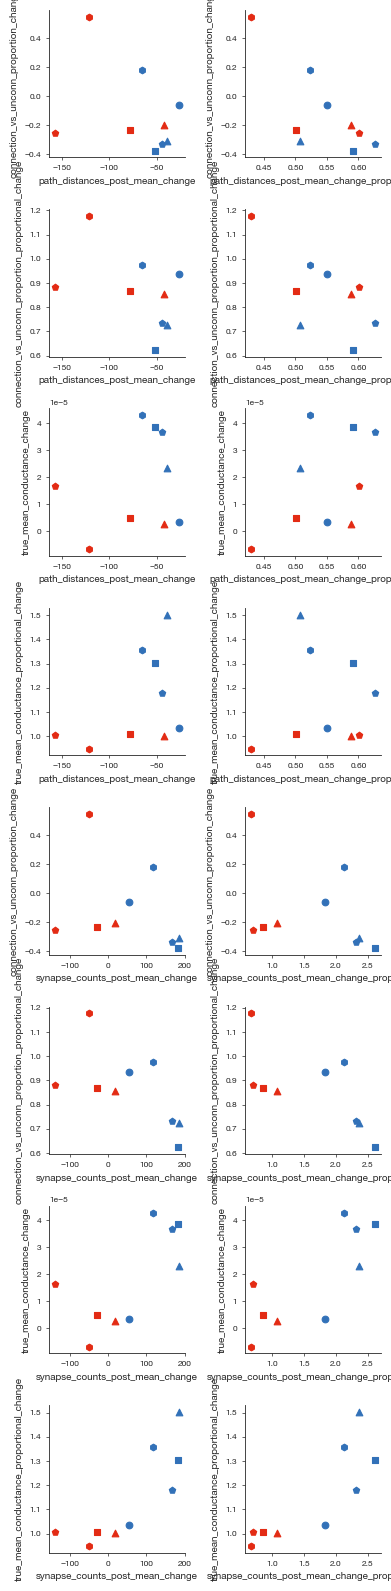

In [49]:
v2_inh_analysis_dir = 'inhibitory_analysis_output/'
import pandas as pd
v2_Inhibition_path_distances_post = pd.read_csv(v2_inh_analysis_dir + 'Inhibition_path_distances_post.csv')
v2_Inhibition_path_distances_pre = pd.read_csv(v2_inh_analysis_dir + 'Inhibition_path_distances_pre.csv')
v2_Inhibition_synapse_counts_post = pd.read_csv(v2_inh_analysis_dir + 'Inhibition_synapse_counts_post.csv')
v2_Inhibition_synapse_counts_pre = pd.read_csv(v2_inh_analysis_dir + 'Inhibition_synapse_counts_pre.csv')

# print(v2_Inhibition_synapse_counts_post)


v2_by_nc_no_inf = v2_by_nc[v2_by_nc['connection_vs_unconn_proportion'] != np.inf]


# print(mean_connection_vs_unconn_proportion_by_nc)
mean_connection_vs_unconn_proportion_by_nc = v2_by_nc_no_inf.groupby(["neuron_class", "window"]).mean().etl.q(window='conn_spont', neuron_class=c_etl.LAYER_EI_NEURON_CLASSES).reset_index()
mean_connection_vs_unconn_proportion_by_nc['layer'] = mean_connection_vs_unconn_proportion_by_nc.apply(lambda row: c_etl.NEURON_CLASS_LAYERS_AND_SYNAPSE_CLASSES[row['neuron_class']]['layers'][0], axis=1)
mean_connection_vs_unconn_proportion_by_nc['synapse_class'] = mean_connection_vs_unconn_proportion_by_nc.apply(lambda row: c_etl.NEURON_CLASS_LAYERS_AND_SYNAPSE_CLASSES[row['neuron_class']]['synapse_class'], axis=1)
mean_connection_vs_unconn_proportion_by_nc['color'] = mean_connection_vs_unconn_proportion_by_nc.apply(lambda row: c_etl.NEURON_CLASS_LAYERS_AND_SYNAPSE_CLASSES[row['neuron_class']]['color'], axis=1)
mean_connection_vs_unconn_proportion_by_nc['marker'] = mean_connection_vs_unconn_proportion_by_nc.apply(lambda row: c_etl.LAYER_EI_NEURON_CLASS_MARKERS[row['neuron_class']], axis=1)

# print(mean_connection_vs_unconn_proportion_by_nc['marker'])

mean_connection_vs_unconn_proportion_by_nc = pd.merge(mean_connection_vs_unconn_proportion_by_nc, v2_Inhibition_path_distances_post, on=['layer', 'synapse_class']).rename(columns={"mean": "I_path_distances_post_mean", "std": "I_path_distances_post_std"})
mean_connection_vs_unconn_proportion_by_nc = pd.merge(mean_connection_vs_unconn_proportion_by_nc, v2_Inhibition_path_distances_pre, on=['layer', 'synapse_class']).rename(columns={"mean": "I_path_distances_pre_mean", "std": "I_path_distances_pre_std"})
mean_connection_vs_unconn_proportion_by_nc = pd.merge(mean_connection_vs_unconn_proportion_by_nc, v2_Inhibition_synapse_counts_post, on=['layer', 'synapse_class']).rename(columns={"mean": "I_synapse_counts_post_mean", "std": "I_synapse_counts_post_std"})
mean_connection_vs_unconn_proportion_by_nc = pd.merge(mean_connection_vs_unconn_proportion_by_nc, v2_Inhibition_synapse_counts_pre, on=['layer', 'synapse_class']).rename(columns={"mean": "I_synapse_counts_pre_mean", "std": "I_path_distances_pre_std"})

mean_connection_vs_unconn_proportion_by_nc['path_distances_post_mean_change'] = mean_connection_vs_unconn_proportion_by_nc['I_path_distances_post_mean'] - mean_connection_vs_unconn_proportion_by_nc['I_path_distances_pre_mean']
mean_connection_vs_unconn_proportion_by_nc['path_distances_post_mean_change_proportion'] = mean_connection_vs_unconn_proportion_by_nc['I_path_distances_post_mean'] / mean_connection_vs_unconn_proportion_by_nc['I_path_distances_pre_mean']
mean_connection_vs_unconn_proportion_by_nc['synapse_counts_post_mean_change'] = mean_connection_vs_unconn_proportion_by_nc['I_synapse_counts_post_mean'] - mean_connection_vs_unconn_proportion_by_nc['I_synapse_counts_pre_mean']
mean_connection_vs_unconn_proportion_by_nc['synapse_counts_post_mean_change_proportion'] = mean_connection_vs_unconn_proportion_by_nc['I_synapse_counts_post_mean'] / mean_connection_vs_unconn_proportion_by_nc['I_synapse_counts_pre_mean']

def compare_neuron_class_stats(df, x_y_key_pairs, c_key="color", m_key='marker'):

    n_rows = len(x_y_key_pairs); n_cols = len(x_y_key_pairs[0])
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 2, n_rows * 2))
    
    for row_ind, fig_row in enumerate(x_y_key_pairs):
        print(row_ind, fig_row)
        for col_ind, x_y_key_pair in enumerate(fig_row):
            ax = axes[row_ind][col_ind]
            x_key = x_y_key_pair[0]
            y_key = x_y_key_pair[1]
            
#             print(row_ind, col_ind, x_key, y_key)
    
            for _, row in df.iterrows():
                ax.scatter(row[x_key], row[y_key], c=row[c_key], marker=row[m_key])

            ax.set_xlabel(x_key)
            ax.set_ylabel(y_key)
    plt.tight_layout()
    plt.savefig("inhibitory_stats.pdf")
    plt.show()
    
    


# x_y_key_pairs = [
#     [["I_path_distances_pre_mean", "connection_vs_unconn_proportion"], ["I_path_distances_post_mean", "connection_vs_unconn_proportion"]],
#     [["I_synapse_counts_pre_mean", "connection_vs_unconn_proportion"], ["I_synapse_counts_post_mean", "connection_vs_unconn_proportion"]],
#     [["I_path_distances_pre_mean", "true_mean_conductance"], ["I_path_distances_post_mean", "true_mean_conductance"]],
#     [["I_synapse_counts_pre_mean", "true_mean_conductance"], ["I_synapse_counts_post_mean", "true_mean_conductance"]],
# ]
# compare_neuron_class_stats(all_nc_stats, x_y_key_pairs)




merged_by_nc_means = merged_by_nc.groupby(["neuron_class"]).mean().reset_index()
merged_by_nc_means['layer'] = merged_by_nc_means.apply(lambda row: c_etl.NEURON_CLASS_LAYERS_AND_SYNAPSE_CLASSES[row['neuron_class']]['layers'][0], axis=1)
merged_by_nc_means['synapse_class'] = merged_by_nc_means.apply(lambda row: c_etl.NEURON_CLASS_LAYERS_AND_SYNAPSE_CLASSES[row['neuron_class']]['synapse_class'], axis=1)
all_nc_stats = pd.merge(mean_connection_vs_unconn_proportion_by_nc, merged_by_nc_means, on='neuron_class')

print(all_nc_stats.columns)

x_y_key_pairs_relative = [
    [["path_distances_post_mean_change", "connection_vs_unconn_proportion_change"], ["path_distances_post_mean_change_proportion", "connection_vs_unconn_proportion_change"]],
    [["path_distances_post_mean_change", "connection_vs_unconn_proportion_proportional_change"], ["path_distances_post_mean_change_proportion", "connection_vs_unconn_proportion_proportional_change"]],
    
    [["path_distances_post_mean_change", "true_mean_conductance_change"], ["path_distances_post_mean_change_proportion", "true_mean_conductance_change"]],
    [["path_distances_post_mean_change", "true_mean_conductance_proportional_change"], ["path_distances_post_mean_change_proportion", "true_mean_conductance_proportional_change"]],
    
    [["synapse_counts_post_mean_change", "connection_vs_unconn_proportion_change"], ["synapse_counts_post_mean_change_proportion", "connection_vs_unconn_proportion_change"]],
    [["synapse_counts_post_mean_change", "connection_vs_unconn_proportion_proportional_change"], ["synapse_counts_post_mean_change_proportion", "connection_vs_unconn_proportion_proportional_change"]],
    
    [["synapse_counts_post_mean_change", "true_mean_conductance_change"], ["synapse_counts_post_mean_change_proportion", "true_mean_conductance_change"]],
    [["synapse_counts_post_mean_change", "true_mean_conductance_proportional_change"], ["synapse_counts_post_mean_change_proportion", "true_mean_conductance_proportional_change"]],
]
compare_neuron_class_stats(all_nc_stats, x_y_key_pairs_relative)


In [32]:
temp = pd.read_csv('Inhibition_synapse_counts.csv')
print(temp)

    Unnamed: 0  layer synapse_class        mean         std
0            0      1           EXC         NaN         NaN
1            1      1           INH   65.225564   58.696912
2            2      2           EXC  212.004087  132.871701
3            3      2           INH  136.928125   90.455160
4            4      3           EXC  184.713178  109.939697
5            5      3           INH  111.413978   73.632364
6            6      4           EXC  201.322539  135.255611
7            7      4           INH  114.389610   78.807062
8            8      5           EXC  465.049008  251.064891
9            9      5           INH  127.571776  100.691107
10          10      6           EXC  157.254435  109.803225
11          11      6           INH  104.841889   72.436134
